In [24]:
import keras
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import merge, Convolution2D, MaxPooling2D, Input, Dense, Flatten, Activation, Dropout, BatchNormalization
from keras.models import Model
from keras.layers.merge import concatenate

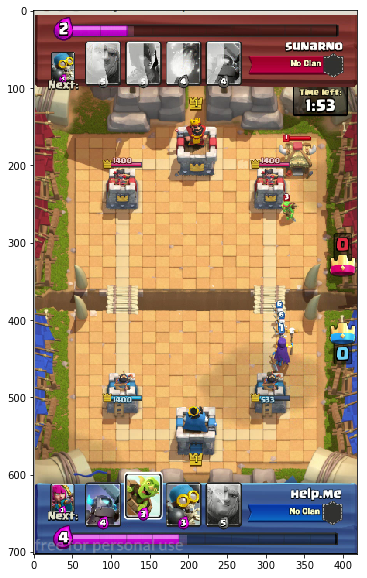

In [25]:
# Set arena size
frame = plt.imread("ClashRoyalBot/Recorder/Data/raw/temp_1011.png")
plt.figure(figsize=(10,10))
plt.imshow(frame)

(460, 330, 4)


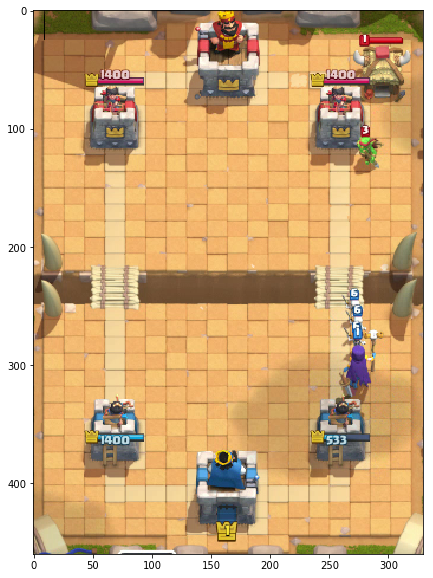

In [26]:
board=frame[140:-103,46:-42,:]
plt.figure(figsize=(10,10))
plt.imshow(board)
print(board.shape)
input_shape=(460, 330, 3)

In [22]:

board=Input(shape=input_shape,name="board-img")
cards=Input(shape=(77,),name="cards-list")

model=Convolution2D(64,kernel_size=(3,3),strides=(1,1))(board)
model=BatchNormalization()(model)
model=Activation('relu')(model)

model=Convolution2D(128,kernel_size=(5,5),strides=(1,1))(model)
model=BatchNormalization()(model)
model=Activation('relu')(model)

model=MaxPooling2D()(model)

model=Convolution2D(256,kernel_size=(5,5),strides=(1,1))(model)
model=BatchNormalization()(model)
model=Activation('relu')(model)

model=Convolution2D(128,kernel_size=(3,3),strides=(1,1))(model)
model=BatchNormalization()(model)
model=Activation('relu')(model)

model=MaxPooling2D()(model)

model=Flatten()(model)

model = keras.layers.concatenate([model, cards])

model=Dense(128)(model)
model=Activation('relu')(model)
model=Dropout(0.7)(model)

model=Dense(256)(model)
model=Activation('relu')(model)
model=Dropout(0.7)(model)

model=Dense(128)(model)
model=Activation('relu')(model)
model=Dropout(0.7)(model)

model=Dense(77)(model)
output=Activation('relu')(model)


In [23]:
cardPredictModel=Model([board,cards],output)
cardPredictModel.summary()
cardPredictModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
board-img (InputLayer)           (None, 460, 330, 3)   0                                            
____________________________________________________________________________________________________
conv2d_11 (Conv2D)               (None, 458, 328, 64)  1792        board-img[0][0]                  
____________________________________________________________________________________________________
batch_normalization_5 (BatchNorm (None, 458, 328, 64)  256         conv2d_11[0][0]                  
____________________________________________________________________________________________________
activation_21 (Activation)       (None, 458, 328, 64)  0           batch_normalization_5[0][0]      
___________________________________________________________________________________________

In [6]:
listt= [file for file in os.listdir("program/datafiles/card_played_data/")]

In [7]:
print (listt)

['cardplayed-file-1.npy', 'cardplayed-file-2.npy']


In [8]:
listt[0]

'cardplayed-file-1.npy'

In [9]:
dataFile=np.load("program/datafiles/card_played_data/"+listt[0])

In [10]:
np.shape(dataFile[100:200,0]) 

(100,)

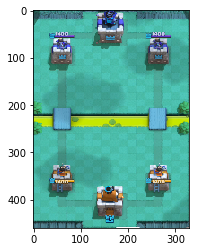

In [11]:
plt.imshow(dataFile[:,0][0])

In [12]:

filesDir="program/datafiles/card_played_data/"

filenames = [ file for file in os.listdir(filesDir)]
filenameIdx=0
batchLen=50

dataFile=np.load(filesDir+filenames[filenameIdx])
fileIdx=0

In [13]:


def getBatch():
    dataFile=np.load(filesDir+filenames[filenameIdx])
    img=dataFile[fileIdx*batchLen:(fileIdx*batchLen)+batchLen,0]
    deck=dataFile[fileIdx*batchLen:(fileIdx*batchLen)+batchLen,1]
    res=dataFile[fileIdx*batchLen:(fileIdx*batchLen)+batchLen,2]
    
    fileIdx+=1
    
    if (fileIdx*batchLen)>=len(dataFile):
        fileIdx=0
        filenameIdx+=1
        dataFile=np.load("datafiles/card_played_data/"+filenames[filenameIdx])
        
    return img,deck,res


In [14]:
imgs=[]
deck=[]
res=[]

for i in range(0,1):
    imgs.append(dataFile[:,0][i])
    deck.append(dataFile[:,1][i])
    res.append(dataFile[:,2][i])

imgs=np.array(imgs)
deck=np.array(deck)
res=np.array(res)
    
print (np.shape(imgs))

(1, 460, 330, 3)


In [ ]:
cardPredictModel.fit(verbose=0)

In [ ]:
cardPredictModel.fit(x={'board-img':imgs,'cards-list':deck},y=res)

Epoch 1/1


In [ ]:
cardPredictModel.save('my_model.h5')